In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands
 
 

In [4]:
#function for downloading from URL 
# if you are using Kaggle, make sure to turn on internet connection and GPU
import tarfile
import urllib
# this snippet of code is modified for our use case with additional comments, original source code:
# https://github.com/tflearn/tflearn/blob/master/tflearn/datasets/cifar10.py
def download(filename, source_url, work_directory):
    if not os.path.exists(work_directory): #check if the folder exists; if not make dir
        os.mkdir(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath): # check if file exists; if not, download
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename, # this is a function to download files
                                                 filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_directory)
    return filepath

In [5]:
#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

In [6]:
# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)

In [7]:
download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","17category-flowers-py")

('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted in to  17category-flowers-py


'17category-flowers-py\\17flowers.tgz'

In [10]:
os.listdir("./17category-flowers-py/") #jpg folder should be available

['17flowers.tgz', 'jpg']

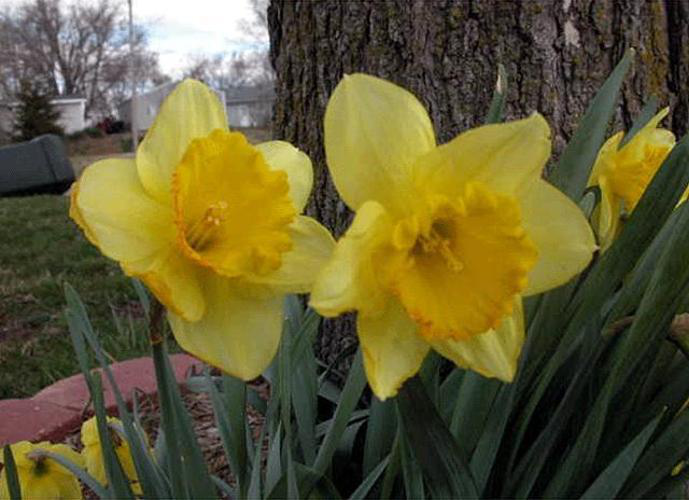

In [2]:
#install Pillow: conda install  pillow
from PIL import Image #show one example of image
Image.open("./17category-flowers-py/jpg/image_0001.jpg")

In [50]:
#load images as np arrays
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [52]:
#all images are loaded as np arrays
images=[]
labels=[]
total=1361
j=1
for i in range(1, total): 
    fname="./17category-flowers-py/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

In [55]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)


In [14]:
images.shape
labels.shape

(1360, 1)

In [17]:
print(labels[1])

[1]


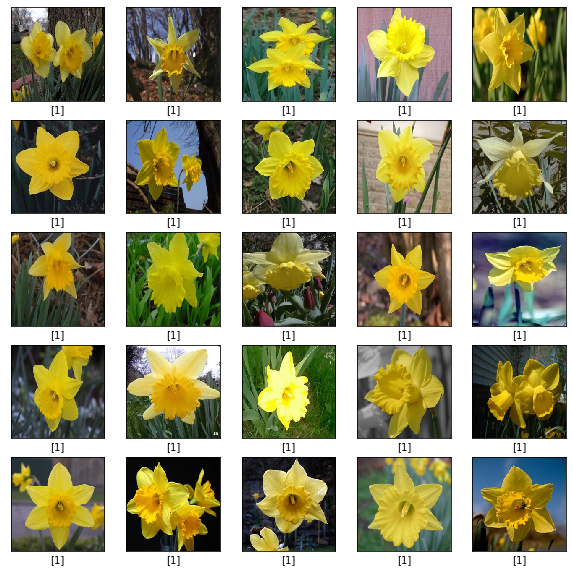

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i]/255, cmap=plt.cm.binary)
    plt.xlabel(labels[i])